In [4]:
print("hallo world")

hallo world


In [5]:
import numpy as np
x=np.array([1,3,5,6,7,9,0,3])
print(x)

[1 3 5 6 7 9 0 3]


In [6]:
print(x.size)

8


In [7]:
 #print(ctrl+m+b) buat bikin baris kode baru anjassss

In [8]:
x[2]=78
print(x)

[ 1  3 78  6  7  9  0  3]


In [9]:
y=np.array([[1,2,3],[4,5,6]])
print(y)


[[1 2 3]
 [4 5 6]]


[1 2 3 4 5]


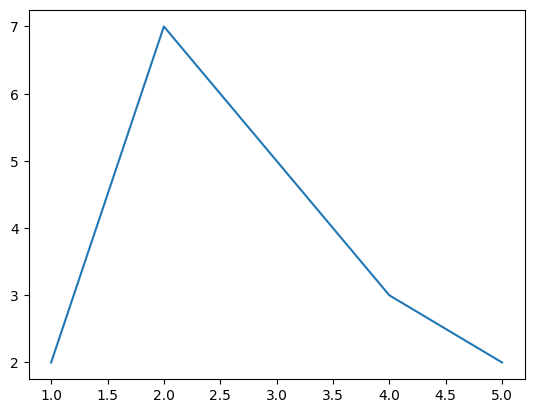

In [10]:
import numpy as np
import matplotlib.pyplot as plt
data=np.array([1, 2, 3, 4, 5])
asa=np.array([2, 7, 5, 3, 2])
print(data)
plt.plot(data,asa)

In [11]:
import pandas as pd
apel=pd.Series([4,5,6,7])
apel.index=['a','b','c','d']#ini kalo mau ngrubah index
jeruk=pd.Series([0,5,4,9])
apel[1]#ini buat manggil apel index ke satu

5

In [12]:
df1=pd.DataFrame([3,2,4,7], columns=['apel'], index=[1,2,3,4])
print(df1)

   apel
1     3
2     2
3     4
4     7


In [13]:
import pandas as pd #iniannya harus ada di tiap pindah kolom sel giniannya kalo ga tar ga terdefinisi
dict1={
    'apel':[5,4,8,7],
    'jeruk':[1,3,4,7]

}
df2= pd.DataFrame(dict1)
print(df2)

   apel  jeruk
0     5      1
1     4      3
2     8      4
3     7      7


In [14]:
df2.count() #countv tu buat ngitung brp banyak subjeknya ukan buta ngitung berapa jumlah atau total di dalamnya

apel     4
jeruk    4
dtype: int64

In [15]:
df2.sum()

apel     24
jeruk    15
dtype: int64

In [16]:
df2.describe() #KEREN BGT GILSSSS

,apel,jeruk
count,4.000000,4.00
mean,6.000000,3.75
std,1.825742,2.50
min,4.000000,1.00
25%,4.750000,2.50
50%,6.000000,3.50
75%,7.250000,4.75
max,8.000000,7.00


In [17]:
df2.T

,0,1,2,3
apel,5,4,8,7
jeruk,1,3,4,7


In [18]:
df3=df2.drop_duplicates(keep='first') #buat nghapus kalo ada data yang samaan
print(df3)

   apel  jeruk
0     5      1
1     4      3
2     8      4
3     7      7


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dd=pd.DataFrame ([1,2,3,4,5,6,7,8], columns=['nilai'])
dd.loc[dd['nilai']>=5,'kelulusan']='lulus'
dd.loc[dd['nilai']<5,'kelulusan']='gagal'
print(dd)

   nilai kelulusan
0      1     gagal
1      2     gagal
2      3     gagal
3      4     gagal
4      5     lulus
5      6     lulus
6      7     lulus
7      8     lulus


In [20]:
df=pd.read_csv('unicorn_startup_companies.csv')
print(df)

FileNotFoundError: [Errno 2] No such file or directory: 'unicorn_startup_companies.csv'

In [ ]:
df.describe()

,Unnamed: 0
count,1221.000000
mean,610.000000
std,352.616647
min,0.000000
25%,305.000000
50%,610.000000
75%,915.000000
max,1220.000000


join dua data frame, yang NAN soalnya indexnya beda

In [ ]:
import pandas as pd
df1=pd.DataFrame([4,3,2,1], columns=['nanas'], index=['a','b','c','d'])
df2=pd.DataFrame([4,3,2,1], columns=['nanas'], index=['e','b','c','d'])
df3=df1*df2
print(df3)


   nanas
a    NaN
b    9.0
c    4.0
d    1.0
e    NaN


BINNING(membagi data ke dalam kelompok kecil

In [ ]:
kelompok_usia =[15,20,55,100]
kelompok_usia_label=['remaja', 'dewasa', 'lansia']
responden=[22,13,45,76,33,22,20,21,25,44,76,65,43,21,12,10,9,3,5,7,5]#kalo kurang atau lebih dari kategori itu munculnya bakal NAN
binning=pd.cut(responden, kelompok_usia, labels=kelompok_usia_label)
print(binning)

['dewasa', NaN, 'dewasa', 'lansia', 'dewasa', ..., NaN, NaN, NaN, NaN, NaN]
Length: 21
Categories (3, object): ['remaja' < 'dewasa' < 'lansia']


In [ ]:
pd.value_counts(binning)

dewasa    9
lansia    3
remaja    1
dtype: int64

In [ ]:
import pandas as pd

# Membuat DataFrame contoh
data = {
    'Tanggal': ['2023-08-01', '2023-08-01', '2023-08-02', '2023-08-02'],
    'Produk': ['A', 'B', 'A', 'B'],
    'Penjualan': [100, 150, 200, 120]
}

df = pd.DataFrame(data)

# Membuat pivot table
pivot_table = df.pivot_table(values='Penjualan', index='Tanggal', columns='Produk', aggfunc='sum')

print(pivot_table)


Produk        A    B
Tanggal             
2023-08-01  100  150
2023-08-02  200  120


GATAU SUMPAHH

In [ ]:
"""import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL
engine=create_engine(URL(
    drivername="mysql",
    username="user",
    password="password",
    host="192.168.1.0",
    database="database1"
))
conn=engine.connect()
querry='SELECT*FROM tabell'
df1=pd.read_sql(sql=query, con=conn, chunksize=10000)"""

import pandas as pd
from sqlalchemy import create_engine

# Buat koneksi ke database
engine = create_engine

# Buka koneksi
conn = engine.connect()

# Query SQL
query = 'SELECT * FROM tabell'

# Baca data menggunakan chunking
chunksize = 10000
df_list = []
for chunk in pd.read_sql(query, con=conn, chunksize=chunksize):
    df_list.append(chunk)

# Gabungkan semua chunk menjadi DataFrame tunggal
df = pd.concat(df_list, ignore_index=True)

# Tutup koneksi
conn.close()

# Sekarang Anda memiliki df yang berisi data dari tabel
print(df)


AttributeError: ignored

In [ ]:
import pandas as pd
df8 = pd.read_csv('bensin.csv')
print(df8)

    Liter  Kilometer
0      20      142.0
1      25      177.0
2      20      144.0
3      30      203.0
4      40      273.0
..    ...        ...
60     31      203.0
61     37      241.0
62     23      142.0
63     36      241.0
64     23      142.0

[65 rows x 2 columns]


import numpy as np
import sklearn.model_selection as ms
liter = df[['liter']]
kilometer = df1[['kilometer']]
x_train,x_test,y_train,y_test=ms.train_test_split(liter,kilometer, test_size=0.2, randon_state=0)
print(x_train.size, x_test.size)


In [ ]:
import numpy as np
import sklearn.model_selection as ms
Liter = df8[['Liter']]#besar kecilnya hurf variable sangat memengaruhi tolong bgt inget
Kilometer = df8[['Kilometer']]
X_train,X_test,y_train,y_test=ms.train_test_split(Liter,Kilometer, test_size=0.2, random_state=0) #uat misahin 80 persen ditrain 20 persen ditest
print(X_train.size, X_test.size)

52 13


ini yang dibawah contoh dari chatgpt gada kaitanya sama kode yang diatas

In [ ]:
import numpy as np
import sklearn.model_selection as ms

# Contoh data fiktif
data = {'liter': [1.0, 1.5, 2.0, 2.5, 3.0],
        'kilometer': [10000, 20000, 30000, 40000, 50000]}

# Buat DataFrame dari data
df = pd.DataFrame(data)

# Pisahkan fitur dan target
X = df[['kilometer']]
y = df['liter']

# Bagi data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=0)

print(x_train.shape, x_test.shape)


(4, 1) (1, 1)


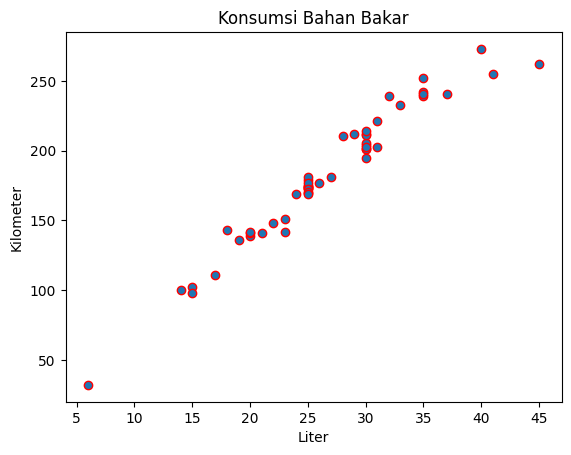

In [ ]:
import numpy as np
import pandas as pd
import sklearn.model_selection as ms
import matplotlib.pyplot as plt

Liter = df8[['Liter']]#besar kecilnya hurf variable sangat memengaruhi tolong bgt inget
Kilometer = df8[['Kilometer']]
X_train,X_test,y_train,y_test=ms.train_test_split(Liter,Kilometer, test_size=0.2, random_state=0) #uat misahin 80 persen ditrain 20 persen ditest
plt.scatter(X_train, y_train, edgecolors='r')
plt.xlabel('Liter')
plt.ylabel('Kilometer')
plt.title('Konsumsi Bahan Bakar')
plt.show()

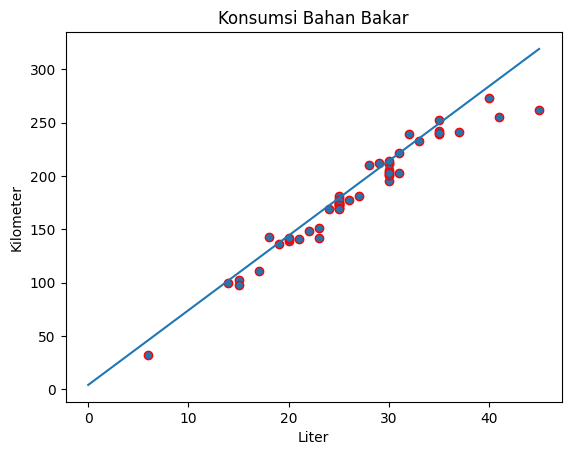

In [ ]:
import numpy as np
import pandas as pd
import sklearn.model_selection as ms
import matplotlib.pyplot as plt

Liter = df8[['Liter']]#besar kecilnya hurf variable sangat memengaruhi tolong bgt inget
Kilometer = df8[['Kilometer']]
X_train,X_test,y_train,y_test=ms.train_test_split(Liter,Kilometer, test_size=0.2, random_state=0) #uat misahin 80 persen ditrain 20 persen ditest
plt.scatter(X_train, y_train, edgecolors='r')
plt.xlabel('Liter')
plt.ylabel('Kilometer')
plt.title('Konsumsi Bahan Bakar')
x1=np.linspace(0, 45) #buat bikin garis gradiennya jadinya kan tau ada yang outliner(nilai ga normal) apa ngga
y1=4+7*x1
plt.plot(x1,y1)
plt.show()

In [ ]:
import sklearn.linear_model as lm
modell=lm.LinearRegression()
modell.fit(X_train,y_train)

LinearRegression()

In [ ]:
modell.coef_

array([[6.45829591]])

In [ ]:
modell.intercept_

array([10.64122249])

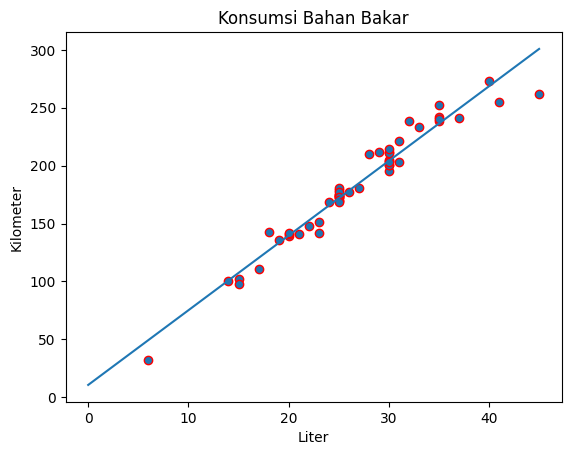

In [ ]:
import numpy as np
import pandas as pd
import sklearn.model_selection as ms
import matplotlib.pyplot as plt

Liter = df8[['Liter']]#besar kecilnya hurf variable sangat memengaruhi tolong bgt inget
Kilometer = df8[['Kilometer']]
X_train,X_test,y_train,y_test=ms.train_test_split(Liter,Kilometer, test_size=0.2, random_state=0) #uat misahin 80 persen ditrain 20 persen ditest
plt.scatter(X_train, y_train, edgecolors='r')
plt.xlabel('Liter')
plt.ylabel('Kilometer')
plt.title('Konsumsi Bahan Bakar')
x1=np.linspace(0, 45) #buat bikin garis gradiennya jadinya kan tau ada yang outliner(nilai ga normal) apa ngga
y1=10.6+6.45*x1
plt.plot(x1,y1)
plt.show()

yang di bawah namanya r-squared kali mendekati angka satu brrti model kita dh cukup bagus

In [ ]:
r2 = modell.score(X_test,y_test)
print(r2)

0.9798523775622333


In [ ]:
jarak= modell.predict([[60]])
print(jarak)

[[398.13897723]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
prediksi= modell.predict(X_test)
print(prediksi)

[[107.51566118]
 [172.0986203 ]
 [172.0986203 ]
 [159.18202848]
 [139.80714074]
 [268.97305898]
 [204.39009986]
 [236.68157942]
 [ 75.22418162]
 [243.13987534]
 [172.0986203 ]
 [139.80714074]
 [191.47350804]]


print(y_test)
Kilometer

In [ ]:
import pandas as pd
df2= pd.read_csv('bensin2.csv')
print(df2)

    Liter  Penumpang  Bagasi  Kecepatan   RPM  Suhu  Kilometer
0      20          1       0         42  3000    29        142
1      25          2      15         50  4000    36        177
2      20          4      10         50  3000    24        144
3      30          5      25         50  3000    18        203
4      40          1      40         50  3200    30        273
..    ...        ...     ...        ...   ...   ...        ...
60     31          3       0         50  3000    30        203
61     37          1       0         50  3000    22        241
62     23          2      10         50  3000    30        142
63     36          2       0         50  3000    20        241
64     23          1      15         50  3000    30        142

[65 rows x 7 columns]


In [ ]:
df2.corr(method='pearson')

<ipython-input-39-c88d150c5dfe>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr(method='pearson')


,Liter,Penumpang,Bagasi,Kecepatan,Suhu,Kilometer
Liter,1.000000,-0.087997,0.097560,0.109370,0.079470,0.700815
Penumpang,-0.087997,1.000000,0.081542,0.111942,-0.039954,-0.034175
Bagasi,0.097560,0.081542,1.000000,0.082096,-0.049363,-0.023318
Kecepatan,0.109370,0.111942,0.082096,1.000000,-0.009752,0.042819
Suhu,0.079470,-0.039954,-0.049363,-0.009752,1.000000,0.136657
Kilometer,0.700815,-0.034175,-0.023318,0.042819,0.136657,1.000000


In [ ]:
import pandas as  pd
df1= pd.read_csv('calonpembeli_ch5.csv')
print(df1)

       ID  Usia  Status  Kelamin  Memiliki_Mobil  Penghasilan  Beli_Mobil
0       1    32       1        0               0          240           1
1       2    49       2        1               1          100           0
2       3    52       1        0               2          250           1
3       4    26       2        1               1          130           0
4       5    45       3        0               2          237           1
..    ...   ...     ...      ...             ...          ...         ...
995   996    51       0        1               2          293           1
996   997    61       1        0               2          275           1
997   998    45       1        0               0          406           1
998   999    48       0        1               2          432           1
999  1000    40       3        1               1          380           1

[1000 rows x 7 columns]


In [ ]:
df1.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,500.500000,43.532000,1.469000,0.481000,0.95200,270.09000,0.633000
std,288.819436,12.672078,1.073402,0.499889,0.80146,95.23681,0.482228
min,1.000000,24.000000,0.000000,0.000000,0.00000,95.00000,0.000000
25%,250.750000,33.000000,1.000000,0.000000,0.00000,187.00000,0.000000
50%,500.500000,43.000000,1.000000,0.000000,1.00000,258.50000,1.000000
75%,750.250000,53.000000,2.000000,1.000000,2.00000,352.25000,1.000000
max,1000.000000,164.000000,3.000000,1.000000,4.00000,490.00000,1.000000


In [ ]:
df1 = df1[df1['Usia'] <= 100]
print(df1)

       ID  Usia  Status  Kelamin  Memiliki_Mobil  Penghasilan  Beli_Mobil
0       1    32       1        0               0          240           1
1       2    49       2        1               1          100           0
2       3    52       1        0               2          250           1
3       4    26       2        1               1          130           0
4       5    45       3        0               2          237           1
..    ...   ...     ...      ...             ...          ...         ...
995   996    51       0        1               2          293           1
996   997    61       1        0               2          275           1
997   998    45       1        0               0          406           1
998   999    48       0        1               2          432           1
999  1000    40       3        1               1          380           1

[998 rows x 7 columns]


In [ ]:
df1.isnull().sum() #buat nyari kalo ada data yang kosong

ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64

In [ ]:
df1.dropna() #untuk menghapus baris atau kolom yang mengandung nilai-nilai yang hilang (NaN atau null) dari sebuah DataFrame.

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1
...,...,...,...,...,...,...,...
995,996,51,0,1,2,293,1
996,997,61,1,0,2,275,1
997,998,45,1,0,0,406,1
998,999,48,0,1,2,432,1


In [ ]:
df1['Beli_Mobil'].value_counts()

1    633
0    365
Name: Beli_Mobil, dtype: int64

In [ ]:
import pandas as pd
df1= pd.read_csv('decisiontree_ch6.csv')
print(df1)

    ID   mesin  bangku penggerak    label
0    1  bensin       4     depan    sedan
1    2  bensin       2     depan    sedan
2    3  bensin       8  belakang  minibus
3    4  diesel       6     depan  minibus
4    5  bensin       5  belakang  minibus
5    6  diesel       8  belakang  minibus
6    7  diesel       8  belakang  minibus
7    8  bensin       4     depan    sedan
8    9  diesel       7  belakang  minibus
9   10  bensin       4     depan    sedan
10  11  bensin       2     depan    sedan
11  12  diesel       6  belakang  minibus
12  13  diesel       8     depan  minibus
13  14  bensin       4     depan    sedan
14  15  diesel       2     depan    sedan
15  16  bensin       4     depan    sedan
16  17  bensin       8  belakang  minibus
17  18  bensin       4     depan    sedan
18  19  diesel       8  belakang  minibus
19  20  diesel       8  belakang  minibus
20  21  bensin       4     depan    sedan
21  22  bensin       4     depan  minibus
22  23  diesel       8  belakang  

untuk menentukan apakah operasi yang diberikan akan memodifikasi objek saat itu juga atau mengembalikan objek baru dengan hasil modifikasi. Secara khusus, ini sering digunakan dalam operasi pada objek seperti DataFrame (pada library pandas) atau pada array NumPy. soalnya itu kan awalnya si yang ada dalam mesin dan penggerak diubah jd 1 apa 0 itu buat menentukan ituanya jadi diganti apa nggak. kayanya itu si maksudnya

In [ ]:
import pandas as pd
df1= pd.read_csv('decisiontree_ch6.csv')
encoding = {"mesin" : {"bensin" : 0, "diesel":1}, "pengggerak" : {"depan":0, "belakang":1}}
df1.replace(encoding, inplace=True)

In [ ]:
print(df1)

    ID  mesin  bangku penggerak    label
0    1      0       4     depan    sedan
1    2      0       2     depan    sedan
2    3      0       8  belakang  minibus
3    4      1       6     depan  minibus
4    5      0       5  belakang  minibus
5    6      1       8  belakang  minibus
6    7      1       8  belakang  minibus
7    8      0       4     depan    sedan
8    9      1       7  belakang  minibus
9   10      0       4     depan    sedan
10  11      0       2     depan    sedan
11  12      1       6  belakang  minibus
12  13      1       8     depan  minibus
13  14      0       4     depan    sedan
14  15      1       2     depan    sedan
15  16      0       4     depan    sedan
16  17      0       8  belakang  minibus
17  18      0       4     depan    sedan
18  19      1       8  belakang  minibus
19  20      1       8  belakang  minibus
20  21      0       4     depan    sedan
21  22      0       4     depan  minibus
22  23      1       8  belakang  minibus
23  24      0   

In [ ]:
X = df1.drop(['ID', 'label'], axis=1)#atribut label sama id dibuang soalnya ga dibutuhin
y=df1['label']

In [ ]:
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2)

In [ ]:
import sklearn.tree as tree #kodenya stuck gatau apa yang salah hmsss
modell= tree.DecisionTreeClassifier(criterion='entropy', max_depth =5)
modell.fit(X_train, y_train)

ValueError: ignored

In [ ]:
import sklearn.ensemble as ens
rf=ens.RandomForestClassifier(n_estimators=100)


In [ ]:
import pandas as pd
import sklearn.model_selection as ms
df=pd.read_csv("decisiontree_ch6.csv")
encoding= {"mesin" : {"bensin" : 0, "diesel" :1}, "penggerak": {"depan":0, "belakang": 1}}
df.replace (encoding, inplace=True)
print(df)
X= df.drop(['ID', 'label'], axis=1)
y=df['label']
X_train, X_test, y_train, y_test =ms.train_test_split(X,y, test_size=0.2)

    ID  mesin  bangku  penggerak    label
0    1      0       4          0    sedan
1    2      0       2          0    sedan
2    3      0       8          1  minibus
3    4      1       6          0  minibus
4    5      0       5          1  minibus
5    6      1       8          1  minibus
6    7      1       8          1  minibus
7    8      0       4          0    sedan
8    9      1       7          1  minibus
9   10      0       4          0    sedan
10  11      0       2          0    sedan
11  12      1       6          1  minibus
12  13      1       8          0  minibus
13  14      0       4          0    sedan
14  15      1       2          0    sedan
15  16      0       4          0    sedan
16  17      0       8          1  minibus
17  18      0       4          0    sedan
18  19      1       8          1  minibus
19  20      1       8          1  minibus
20  21      0       4          0    sedan
21  22      0       4          0  minibus
22  23      1       8          1  

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
print(rf)

RandomForestClassifier()


In [ ]:
y_prediksi =rf.predict(X_test)

In [ ]:
import sklearn.metrics as met
akurasi=met.accuracy_score(y_test, y_prediksi) #y adalah target yang lagi kita urus ato cari
print (akurasi) #kalo hasilnya satu berarti snagat akuran kalo 0 berarti akurasinya setengah


1.0


In [ ]:
score= rf.feature_importances_
print(score)

[0.15186063 0.57340515 0.27473422]


In [ ]:
import pandas as pd
import numpy as np
import sklearn.tree as tree
import sklearn.model_selection as ms
import sklearn.ensemble as ens
import sklearn.metrics as met
rf= ens.RandomForestClassifier(n_estimators=100)
df=pd.read_csv("adult_data.csv")

In [ ]:
df.head(10)

,age,workclass,fnlwft,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours-per-week,native_country,income
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,160187,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,45781,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,159449,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


In [ ]:
df.dropna(inplace=True)#buat ngebuang data yang kosong

In [ ]:
import sklearn.preprocessing as prep #lanjutan codenya ada di halaman 154 tp mls lanjutinya banyak bgt
gender=prep.LabelEncoder()
gender.fit(df['sex'])
df['sex_code']= gender.transform(df['sex'])
df[['sex', 'sex_code']].head(5)


,sex,sex_code
0,Male,1
1,Male,1
2,Male,1
3,Male,1
4,Female,0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['sex_code'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['sex_code'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_4, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_5, *[[['index', 'sex_code']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_6, *['index', 'sex'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_7, *['sex_code', 'sex'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_8, *['index', 'sex_code', 'sex'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['index', 'count()', 'sex'], **{})
chart

In [ ]:
import pandas as pd
import sklearn. neural_network as ann
import sklearn.model_selection as ms
df_occupancy=pd.read_csv('datatraining.csv', header=0, names=["id",  "date","Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy"])

ParserError: ignored

In [ ]:
df=pd.read_csv('datatraining.csv')
print(df)

     "date","Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy"
0     "1","2015-02-04 17:51:00",23.18,27.272,426,721...                       
1     "2","2015-02-04 17:51:59",23.15,27.2675,429.5,...                       
2     "3","2015-02-04 17:53:00",23.15,27.245,426,713...                       
3     "4","2015-02-04 17:54:00",23.15,27.2,426,708.2...                       
4     "5","2015-02-04 17:55:00",23.1,27.2,426,704.5,...                       
...                                                 ...                       
8138  "8139","2015-02-10 09:29:00",21.05,36.0975,433...                       
8139  "8140","2015-02-10 09:29:59",21.05,35.995,433,...                       
8140  "8141","2015-02-10 09:30:59",21.1,36.095,433,7...                       
8141  "8142","2015-02-10 09:32:00",21.1,36.26,433,82...                       
8142  "8143","2015-02-10 09:33:00",21.1,36.2,447,821...                       

[8143 rows x 1 columns]


In [ ]:
import pandas as pd
df= pd.read_csv('churnprediction_ch9.csv', sep=',')
index_col=['customer_id']

tabel paling kanan kalo 1 berarti pelanggan itu churn/berhenti berlangganan tp kalo masih aktif tandanya 0. ini yang akan dijadiin target prediksi

In [ ]:
df.head(5)

,customer_id,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
0,285fae8412c4720a0c79d95f98434422,Kartu A,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
1,f45bce87ca6bf100f222fcc0db06b624,Kartu A,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
2,09b54557b1e2a10d998e3473a9ccd2a0,Kartu A,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
3,11f252f48be36f93dd429f2ec86cb2f5,Kartu A,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
4,a8df29ae9195eea348d2f74c967b978d,Kartu A,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  10000 non-null  object 
 1   product      10000 non-null  object 
 2   reload_1     10000 non-null  float64
 3   reload_2     10000 non-null  float64
 4   video        10000 non-null  float64
 5   music        10000 non-null  float64
 6   games        10000 non-null  float64
 7   chat_1       10000 non-null  float64
 8   chat_2       10000 non-null  float64
 9   socmed_1     10000 non-null  float64
 10  socmed_2     10000 non-null  float64
 11  internet     10000 non-null  float64
 12  days_active  10000 non-null  int64  
 13  tenure       10000 non-null  int64  
 14  churn        10000 non-null  int64  
dtypes: float64(10), int64(3), object(2)
memory usage: 1.1+ MB


In [ ]:
dfaktifChurn=df.groupby('churn').count()

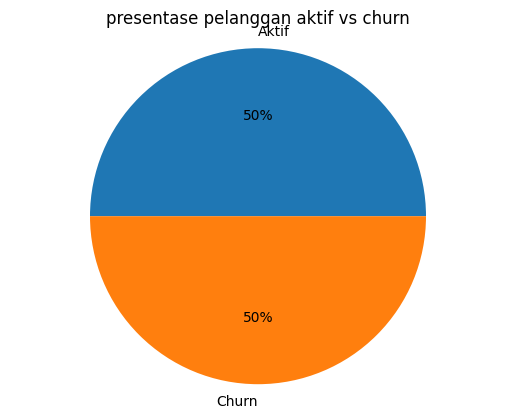

In [ ]:
import matplotlib.pyplot as plt
plt.pie(dfaktifChurn['product'], labels=['Aktif','Churn'],autopct='%1.0f%%')
plt.title('presentase pelanggan aktif vs churn')
plt.axis('equal')
plt.show()

In [ ]:
df['product'].value_counts()

8000    1
2000    1
Name: product, dtype: int64

In [ ]:
pd.get_dummies(df['product'])

,2000,8000
churn,,
0,0,1
1,1,0
